# Daily Electricity Forecasting

This notebook is a first cut at performing a Monte Carlo simulation to estimate the electricity usage of a group of households, given the forecast proportion of each type of appliance likely to be owned.

We have two inputs for each appliance type, probability of a single household owning the appliance, and the daily energy use of the appliance

| | probability of ownership | kWh per day |
|-|--------------------------|-------------|
| TV | 0.5           | 0.1 |
| light | 0.9        | 0.1 |

We create and populate a matrix with the number of expected appliances of each type.  The number of appliances is obtained from a binomial distribution.  For example:

|         |  TV    |     radio |
|---------|--------|-----------|
| trial 1 | num TV | num radio |
| trial 2 | num TV | num radio |

The columns of this table are then multiplied by the corresponding energy usage for that appliance and summed.  This leaves you with a column of values representing possible daily electricity totals.  A histogram constructed from this will give some idea of the likely range of electricity use in the future.

This method does not yet consider the rate of growth of electricity use.

In [56]:
%matplotlib inline
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

In [57]:
def get_num_appliances(n_households, proportion, num_samples):
    return binom.rvs(n_households, proportion, size=num_samples)

# is there a way to get nicely aligned multiplications by using labeled data?
# is it simple to do this with xray?

# create vector of trials for each appliance
appliances = ['TV', 'radio']
num_samples = 1000
n_households = 100
proportion = 0.5 # make dictionary or lookup table
simulation = np.zeros((num_samples, len(appliances)))
for i, app in enumerate(appliances):
    simulation[:,i] = get_num_appliances(n_households, proportion, num_samples)

In [58]:
energy_simulation = simulation * np.array([1., 2.])
daily_simulations = energy_simulation.sum(axis=1)

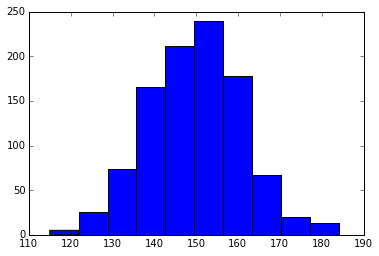

In [59]:
plt.hist(daily_simulations)
plt.show()